In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

In [151]:
data = pd.read_csv('vivino_clean.csv')

In [152]:
# Preprocesar la columna 'pairing'
data['pairing'] = data['pairing'].str.replace(r'\(.*?\)', '', regex=True)
data['pairing'] = data['pairing'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [153]:
data

,winery,wine_name,year,price,score,country,wine_type,pairing,picture,price_quality,...,flavour_floral,flavour_fruta negra,flavour_fruta seca,flavour_frutos de árbol,flavour_frutos rojos,flavour_microbio,flavour_roble,flavour_terroso,flavour_tropical,flavour_vegetal
0,Quinta de Catralvos,Alicante Bouschet - Syrah,2021,14.95,4.5,Portugal,2,"Ternera, Ternera lechal, Aves, Pasta",//images.vivino.com/thumbs/AwtSRa2ZSSWJE1AoViX...,6,...,False,True,False,False,False,False,False,False,False,False
1,Quinta do Ermizio,Vinha do Cuco,2023,16.95,4.5,Portugal,1,"Marisco, Aperitivos y tentempiés, Pescado blan...",//images.vivino.com/thumbs/M2tFNe1GQQaqrU_wn-q...,6,...,False,False,False,False,False,False,False,False,False,False
2,Sociedade Vinicola de Palmela,Personalizado,2022,17.95,4.5,Portugal,2,"Ternera, Ternera lechal, Aves, Pasta",//images.vivino.com/thumbs/UgUGQSbaTSGQMHMk6zj...,6,...,False,False,False,False,False,False,True,False,False,False
3,San Marzano,60 Sessantanni Old Vines Primitivo di Manduria,2018,21.95,4.4,Italia,2,"Ternera, Cordero, Aves, Pasta",//images.vivino.com/thumbs/tLtS1VwaRxCL25zZ-j6...,4,...,False,False,False,False,False,False,True,False,False,False
4,Puglia Pop,Fico Susumaniello,2022,19.95,4.4,Italia,2,"Ternera, Cordero, Pasta",//images.vivino.com/thumbs/XAKEoj1sR5SllZQ-x5N...,4,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,Niepoort,V.V. Bical - Maria Gomes Vinhas Velhas,2018,38.35,4.2,Portugal,1,"Marisco, Pescado azul, Aperitivos y tentempiés...",//images.vivino.com/thumbs/fq2KfOb6QgyVmXeEsow...,4,...,False,False,False,False,False,False,False,True,False,False
1761,Forjas del Salnés,Goliardo a Telleira Albariño,2021,34.51,4.2,España,1,"Marisco, Vegetariana, Pasta, Aperitivos y tent...",//images.vivino.com/thumbs/YHiRsXtVRteasXHBETF...,4,...,False,False,False,True,False,False,False,False,False,False
1762,Fernández de Piérola,Vitium Reserva,2015,30.20,4.2,España,2,"Ternera, Cordero, Ternera lechal, Aves",//images.vivino.com/thumbs/Sfpl41O_T2S__xayMq3...,4,...,False,False,False,False,False,False,True,False,False,False
1763,Cota 45,Pandorga Tintilla de Rota,2022,39.15,4.2,España,2,"Ternera, Ternera lechal, Aves, Pasta",//images.vivino.com/thumbs/s0OuKAb-SYiyh9n3SP-...,1,...,False,True,False,False,False,False,False,False,False,False


## Elimnar columnas innecesarias pero con información relevante

In [154]:
data.drop(columns=['winery','wine_name', 'country', 'picture', 'Estilo de vino'], inplace=True)

## Separar la columna 'pairing' en listas

In [155]:
# Verificar el resultado
data.head()

,year,price,score,wine_type,pairing,price_quality,Contenido de alcohol,country_España,country_Francia,country_Italia,...,flavour_floral,flavour_fruta negra,flavour_fruta seca,flavour_frutos de árbol,flavour_frutos rojos,flavour_microbio,flavour_roble,flavour_terroso,flavour_tropical,flavour_vegetal
0,2021,14.95,4.5,2,"Ternera, Ternera lechal, Aves, Pasta",6,14.0,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,2023,16.95,4.5,1,"Marisco, Aperitivos y tentempiés, Pescado blan...",6,12.5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022,17.95,4.5,2,"Ternera, Ternera lechal, Aves, Pasta",6,13.5,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2018,21.95,4.4,2,"Ternera, Cordero, Aves, Pasta",4,14.5,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,2022,19.95,4.4,2,"Ternera, Cordero, Pasta",4,14.0,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [156]:
# Dividir la columna 'pairing' en una lista de elementos
data['pairing'] = data['pairing'].str.split(', ')

# Creamos una lista con todos los elementos únicos de 'pairing'
pairing_dummies = data['pairing'].apply(lambda x: pd.Series(1, index=x)).fillna(0)

# Unir los datos originales con las columnas dummy
data = data.join(pairing_dummies)

# Eliminar la columna 'pairing'
data.drop(columns=['pairing'], inplace=True)

In [157]:
data

,year,price,score,wine_type,price_quality,Contenido de alcohol,country_España,country_Francia,country_Italia,country_Other,...,Cerdo,Vegetariana,Queso azul,Pescado azul,Comida picante,Queso tierno y cremoso,Champiñones,Queso curado,Queso de leche de cabra,Aperitivo
0,2021,14.95,4.5,2,6,14.00,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023,16.95,4.5,1,6,12.50,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,17.95,4.5,2,6,13.50,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,21.95,4.4,2,4,14.50,False,False,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022,19.95,4.4,2,4,14.00,False,False,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2018,38.35,4.2,1,4,11.00,False,False,False,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1761,2021,34.51,4.2,1,4,12.50,True,False,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1762,2015,30.20,4.2,2,4,13.91,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1763,2022,39.15,4.2,2,1,10.00,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
# Mostramos todas las columnas que tenemos
print(data.columns)

Index(['year', 'price', 'score', 'wine_type', 'price_quality',
       'Contenido de alcohol', 'country_España', 'country_Francia',
       'country_Italia', 'country_Other', 'flavour_cítrico',
       'flavour_especias', 'flavour_floral', 'flavour_fruta negra',
       'flavour_fruta seca', 'flavour_frutos de árbol', 'flavour_frutos rojos',
       'flavour_microbio', 'flavour_roble', 'flavour_terroso',
       'flavour_tropical', 'flavour_vegetal', 'Ternera', 'Ternera lechal',
       'Aves', 'Pasta', 'Marisco', 'Aperitivos y tentempiés', 'Pescado blanco',
       'Carne adobada', 'Cordero', 'Ciervo', 'Carne de venado', 'Cerdo',
       'Vegetariana', 'Queso azul', 'Pescado azul', 'Comida picante',
       'Queso tierno y cremoso', 'Champiñones', 'Queso curado',
       'Queso de leche de cabra', 'Aperitivo'],
      dtype='object')


In [159]:
# Selecionamos las columnas de características
X_columns = data[['year', 'price', 'score', 'wine_type', 'price_quality', 'Contenido de alcohol',
                  'country_España', 'country_Francia', 'country_Italia', 'country_Other', 'flavour_cítrico', 'flavour_especias', 'flavour_floral',
                  'flavour_fruta negra', 'flavour_fruta seca', 'flavour_frutos de árbol',
                  'flavour_frutos rojos', 'flavour_microbio', 'flavour_roble', 'flavour_terroso',
                  'flavour_tropical', 'flavour_vegetal']]

# Seleccionamos las columnas objetivo (aquellas que no están en X_columns)
y = data.drop(columns=X_columns.columns)

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_columns, y, test_size=0.20, random_state=42)

In [160]:
# Comprobamos que se han divido los datos correctamente
print(f"Total de datos: {len(data)}")
print(f"Conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Conjunto de prueba: {X_test.shape[0]}")

Total de datos: 1765
Conjunto de entrenamiento: 1412
Conjunto de prueba: 353


In [161]:
data

,year,price,score,wine_type,price_quality,Contenido de alcohol,country_España,country_Francia,country_Italia,country_Other,...,Cerdo,Vegetariana,Queso azul,Pescado azul,Comida picante,Queso tierno y cremoso,Champiñones,Queso curado,Queso de leche de cabra,Aperitivo
0,2021,14.95,4.5,2,6,14.00,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023,16.95,4.5,1,6,12.50,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,17.95,4.5,2,6,13.50,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,21.95,4.4,2,4,14.50,False,False,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022,19.95,4.4,2,4,14.00,False,False,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2018,38.35,4.2,1,4,11.00,False,False,False,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1761,2021,34.51,4.2,1,4,12.50,True,False,False,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1762,2015,30.20,4.2,2,4,13.91,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1763,2022,39.15,4.2,2,1,10.00,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Entrear un modelo de clasificación
model = MultiOutputClassifier(RandomForestClassifier(class_weight='balanced'))
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced'))

In [163]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Asegurarse de que las predicciones sean un DataFrame para compatibilidad con y_test
y_pred = pd.DataFrame(y_pred, columns=y_test.columns, index=y_test.index)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Mostrar las métricas de evaluación
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.32
Precision: 0.78
Recall: 0.72
F1 Score: 0.74


### Ver el balanceo de las diferentes columnas

In [164]:
# Obtener la importancia de características del modelo entrenado
importances = model.estimators_[0].feature_importances_  # En MultiOutputClassifier, acceder al primer modelo base
feature_names = X_columns.columns

# Crear un DataFrame para visualizar la importancia de características
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(feature_importance_df)


                    Feature  Importance
3                 wine_type    0.519374
0                      year    0.081700
5      Contenido de alcohol    0.080370
1                     price    0.074935
15  flavour_frutos de árbol    0.053440
18            flavour_roble    0.030117
2                     score    0.027019
13      flavour_fruta negra    0.023984
4             price_quality    0.021854
6            country_España    0.016468
16     flavour_frutos rojos    0.015188
7           country_Francia    0.014540
10          flavour_cítrico    0.013966
9             country_Other    0.010329
19          flavour_terroso    0.007863
8            country_Italia    0.006243
20         flavour_tropical    0.001261
11         flavour_especias    0.000713
17         flavour_microbio    0.000393
14       flavour_fruta seca    0.000141
21          flavour_vegetal    0.000101
12           flavour_floral    0.000000


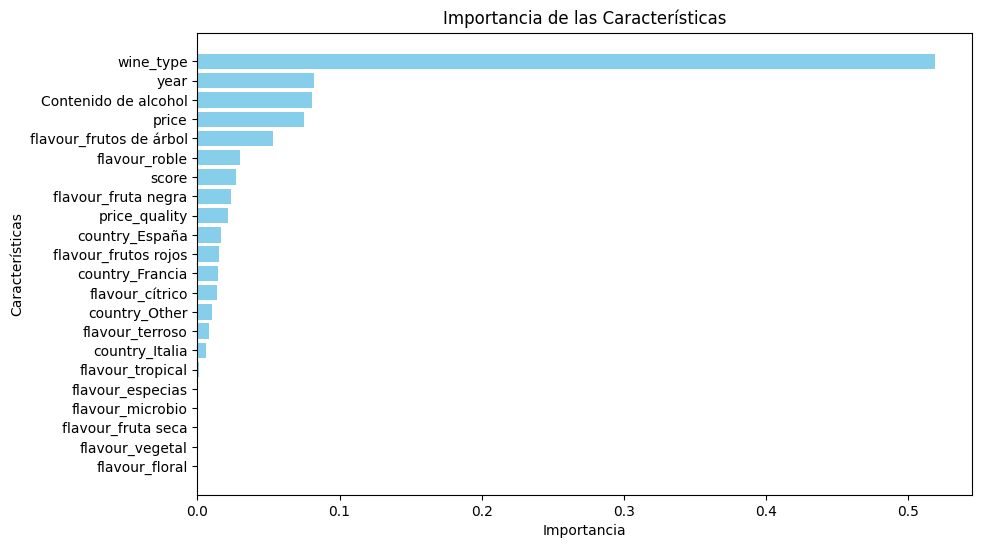

In [166]:
# Ordenar las características por importancia
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.show()

#### Aplicar un balanceo manual ya que el balanceo de datos estaba desequilibrado

In [167]:
# Importancias originales del modelo
importances = model.estimators_[0].feature_importances_

# Nombres de las características
feature_names = X_columns.columns

# Definir un valor de ajuste (puedes ajustar estos valores según lo necesites)
substract_value = 0.4  # Valor a restar de las importancias altas
add_value = 0.1       # Valor a sumar a las importancias bajas

# Ordenar las importancias de mayor a menor
sorted_indices = np.argsort(importances)[::-1]

# Restar a las importancias altas y sumar a las bajas
adjusted_importances = importances.copy()

# Aplicar la resta en las importancias más altas
for i in range(len(importances)):
    if importances[i] > np.percentile(importances, 100):  # Top 25% de las características (más importantes)
        adjusted_importances[i] -= substract_value

# Ajuste manual para 'wine_type', buscando el índice correspondiente
wine_type_index = np.where(feature_names == 'wine_type')[0][0]  # Encuentra el índice de 'wine_type'
adjusted_importances[wine_type_index] -= substract_value

# Aplicar la suma en las importancias más bajas
for i in range(len(importances)):
    if importances[i] < np.percentile(importances, 25):  # Bottom 25% de las características (menos importantes)
        adjusted_importances[i] += add_value

# Normalizar las importancias ajustadas para que sumen 1
normalized_importances = (adjusted_importances - np.min(adjusted_importances)) / (np.max(adjusted_importances) - np.min(adjusted_importances))

# Crear un DataFrame con las importancias ajustadas
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Original Importance': importances,
    'Adjusted Importance': adjusted_importances,
    'Normalized Adjusted Importance': normalized_importances
}).sort_values(by='Normalized Adjusted Importance', ascending=False)

# Mostrar el DataFrame
feature_importance_df


,Feature,Original Importance,Adjusted Importance,Normalized Adjusted Importance
3,wine_type,0.519374,0.119374,1.000000
20,flavour_tropical,0.001261,0.101261,0.839900
11,flavour_especias,0.000713,0.100713,0.835055
17,flavour_microbio,0.000393,0.100393,0.832227
14,flavour_fruta seca,0.000141,0.100141,0.829998
21,flavour_vegetal,0.000101,0.100101,0.829643
12,flavour_floral,0.000000,0.100000,0.828750
0,year,0.081700,0.081700,0.666992
5,Contenido de alcohol,0.080370,0.080370,0.655233
1,price,0.074935,0.074935,0.607193


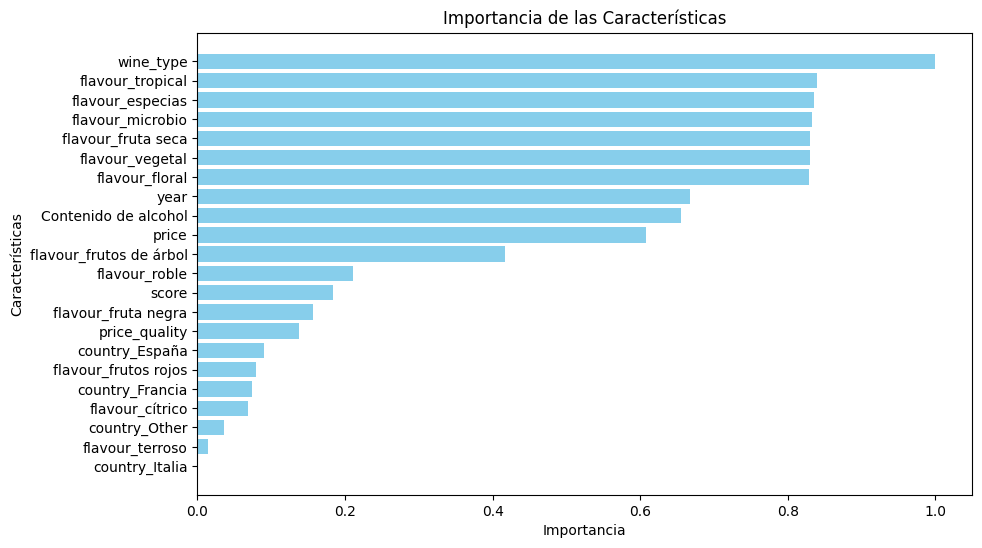

In [168]:
# Ordenar las características por importancia
feature_importance_df.sort_values(by='Normalized Adjusted Importance', ascending=True, inplace=True)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Normalized Adjusted Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.show()


In [170]:
# Función para obtener recomendaciones de maridaje
def get_pairing_recommendations(wine_features, country, flavour):
    # Nombres de las características requeridas
    feature_names = ['year', 'price', 'score', 'wine_type', 'price_quality', 'Contenido de alcohol',
                     'country_España', 'country_Francia', 'country_Italia', 'country_Other',
                     'flavour_cítrico', 'flavour_especias', 'flavour_floral', 'flavour_fruta negra',
                     'flavour_fruta seca', 'flavour_frutos de árbol', 'flavour_frutos rojos',
                     'flavour_microbio', 'flavour_roble', 'flavour_terroso', 'flavour_tropical', 'flavour_vegetal']

    # Mapeo de países a columnas del One-Hot Encoding
    country_map = {
        'España': [1, 0, 0, 0],
        'Francia': [0, 1, 0, 0],
        'Italia': [0, 0, 1, 0],
        'Otro': [0, 0, 0, 1]  # Para cualquier otro país
    }

    # Si el país no está en el mapeo, asignamos 'Otro' automáticamente
    if country not in country_map:
        country = 'Otro'

    # Obtener las características del país según el mapeo
    country_features = country_map[country]

    # Reemplazar las características del país en la entrada
    wine_features[6:] = country_features  # Las columnas 'country_España', 'country_Francia', 'country_Italia', 'country_Other'

    # Hacemos lo mismo para flavour
    flavour_map = {
        'cítrico': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'especias': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'floral': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'fruta negra': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        'fruta seca': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        'frutos de árbol': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        'frutos rojos': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        'microbio': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        'roble': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        'terroso': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        'tropical': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        'vegetal': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    }

    # Obtener las características del sabor según el mapeo
    flavour_features = flavour_map[flavour]

    # Reemplazar las características del país en la entrada
    wine_features[10:] = flavour_features

    # Validar que las características coincidan con las columnas
    if len(wine_features) != len(feature_names):
        raise ValueError(f"El número de características proporcionadas ({len(wine_features)}) no coincide con las columnas requeridas ({len(feature_names)}).")

    # Crear un DataFrame con las características del vino
    wine_features_df = pd.DataFrame([wine_features], columns=feature_names)

    # Predecir las recomendaciones de maridaje
    predicted_pairings = model.predict(wine_features_df)

    # Convertir las predicciones en un DataFrame con los nombres de las columnas objetivo
    return pd.DataFrame(predicted_pairings, columns=y.columns)

# Ejemplo de uso
wine_features = [2020, 24.5, 4.2, 2, 4, 12.00]  # year, price, score, wine_type, price_quality, Contenido de alcohol
country = 'España' # País
flavour = 'tropical' # Sabor

# Obtener las recomendaciones de maridaje
pairing_recommendations = get_pairing_recommendations(wine_features, country, flavour)

# Mostrar las recomendaciones
pairing_recommendations


,Ternera,Ternera lechal,Aves,Pasta,Marisco,Aperitivos y tentempiés,Pescado blanco,Carne adobada,Cordero,Ciervo,...,Cerdo,Vegetariana,Queso azul,Pescado azul,Comida picante,Queso tierno y cremoso,Champiñones,Queso curado,Queso de leche de cabra,Aperitivo
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## Guardamos el modelo

import joblib

# Guardar el modelo en un archivo
joblib.dump(model, 'modelo_maridaje.pkl')

['modelo_maridaje.pkl']